<a href="https://colab.research.google.com/github/TejaswiniKashireddy/1234/blob/main/LabExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Load the California Housing dataset
housing_data = fetch_california_housing(as_frame=True)
df = housing_data.frame

# Define target as binary classification: high price (1) and low price (0)
median_price = df['MedHouseVal'].median()
df['HighPrice'] = np.where(df['MedHouseVal'] > median_price, 1, 0)

# Drop the original target column 'MedHouseVal'
X = df.drop(columns=['MedHouseVal', 'HighPrice'])
y = df['HighPrice']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      3069
           1       0.83      0.82      0.83      3123

    accuracy                           0.83      6192
   macro avg       0.83      0.83      0.83      6192
weighted avg       0.83      0.83      0.83      6192



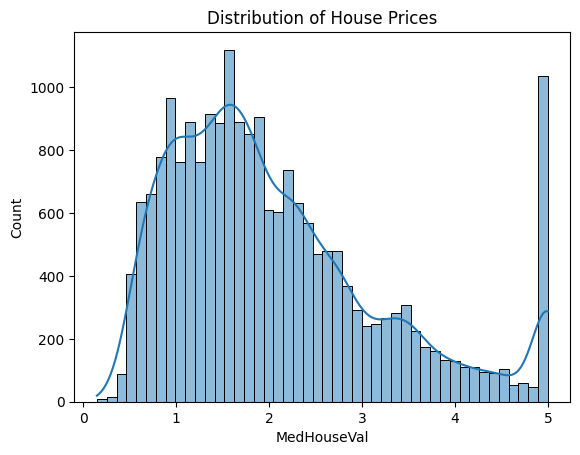

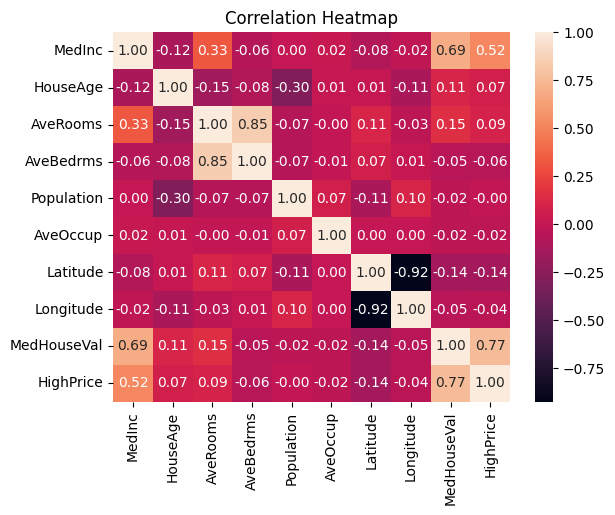

Cross-Validation Scores: [0.83564014 0.84013841 0.84083045 0.83523711 0.83281412]
Average CV Score: 0.84
Accuracy: 0.84
ROC-AUC Score: 0.92


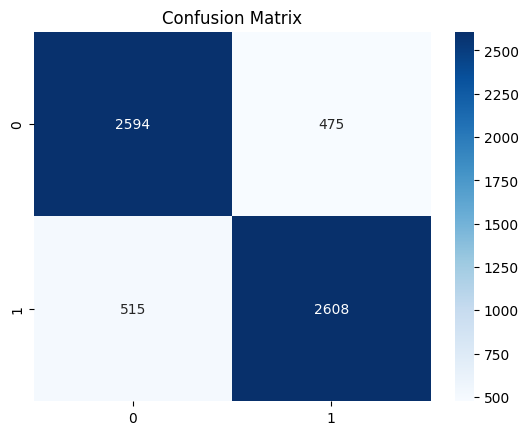

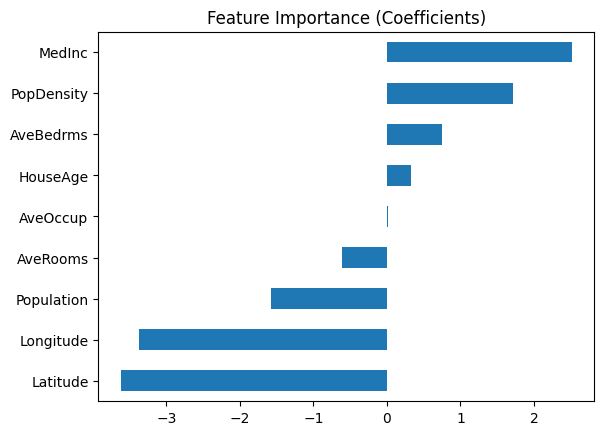

Model saved as 'logistic_regression_housing_model.pkl'


In [3]:
# Import additional libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import joblib

# Step 1: Exploratory Data Analysis (EDA)
# Visualize the distribution of target and features
sns.histplot(df['MedHouseVal'], kde=True)
plt.title("Distribution of House Prices")
plt.show()

sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 2: Feature Engineering
# Create new features (e.g., population density)
df['PopDensity'] = df['Population'] / df['AveOccup']

# Step 3: Update Features and Target
X = df.drop(columns=['MedHouseVal', 'HighPrice'])
y = df['HighPrice']

# Step 4: Train-Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Hyperparameter Tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Step 6: Cross-Validation Score
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.2f}")

# Step 7: Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Step 8: Feature Importance
coefficients = pd.Series(best_model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind="barh")
plt.title("Feature Importance (Coefficients)")
plt.show()

# Step 9: Save the Model
joblib.dump(best_model, 'logistic_regression_housing_model.pkl')
print("Model saved as 'logistic_regression_housing_model.pkl'")